In [1]:
import os
import nltk
import threading
import pandas as pd
import concurrent.futures
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

In [19]:
def count_tokens(filename, result_dict, year):
    with open(filename, 'r', encoding='utf-8') as file:
        print(filename)
        content = file.read().lower()
        # Simple tokenization by splitting on whitespace
        tokens = content.split()
        token_count = len(tokens)

        # Use a lock to protect the shared result_dict
        with result_lock:
            if year not in result_dict:
                result_dict[year] = {'Token Count': 0}
            
            result_dict[year]['Token Count'] += token_count

In [20]:
def plot_token_counts(result_dict):
    years = sorted(list(result_dict.keys()))
    token_counts = [result_dict[year]['Token Count'] for year in years]

    plt.figure(figsize=(50, 30))
    plt.bar(years, token_counts, label='Token Count', color='green')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Total Token Counts Over the Years')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('token_counts.png')
    plt.show()


In [33]:
def plot_token_counts_line(result_dict):
    sorted_results = sorted(result_dict.items(), key=lambda x: int(x[0]))
    years = [int(year) for year, data in sorted_results][2:]
    token_counts = [data['Token Count'] for year, data in sorted_results][2:]

    plt.figure(figsize=(50, 30))
    plt.plot(years, token_counts, marker='o', label='Token Count', color='green', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Total Token Counts Over the Years (Line Graph)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.savefig('token_counts_line.png')
    plt.show()


/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1912.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1906.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/2002.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1899.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1866.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1872.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1867.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1873.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1898.txt/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/2003.txt

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1913.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1907.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1939.txt/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1905.txt

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1911

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1982.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1941.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1969.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1955.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1835.txt/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1821.txt

/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1808.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1809.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1834.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1968.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1820.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1954.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1940.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1983.txt
/Users/praharshita/Desktop/Capstone/cleaned_files_by_year/1997

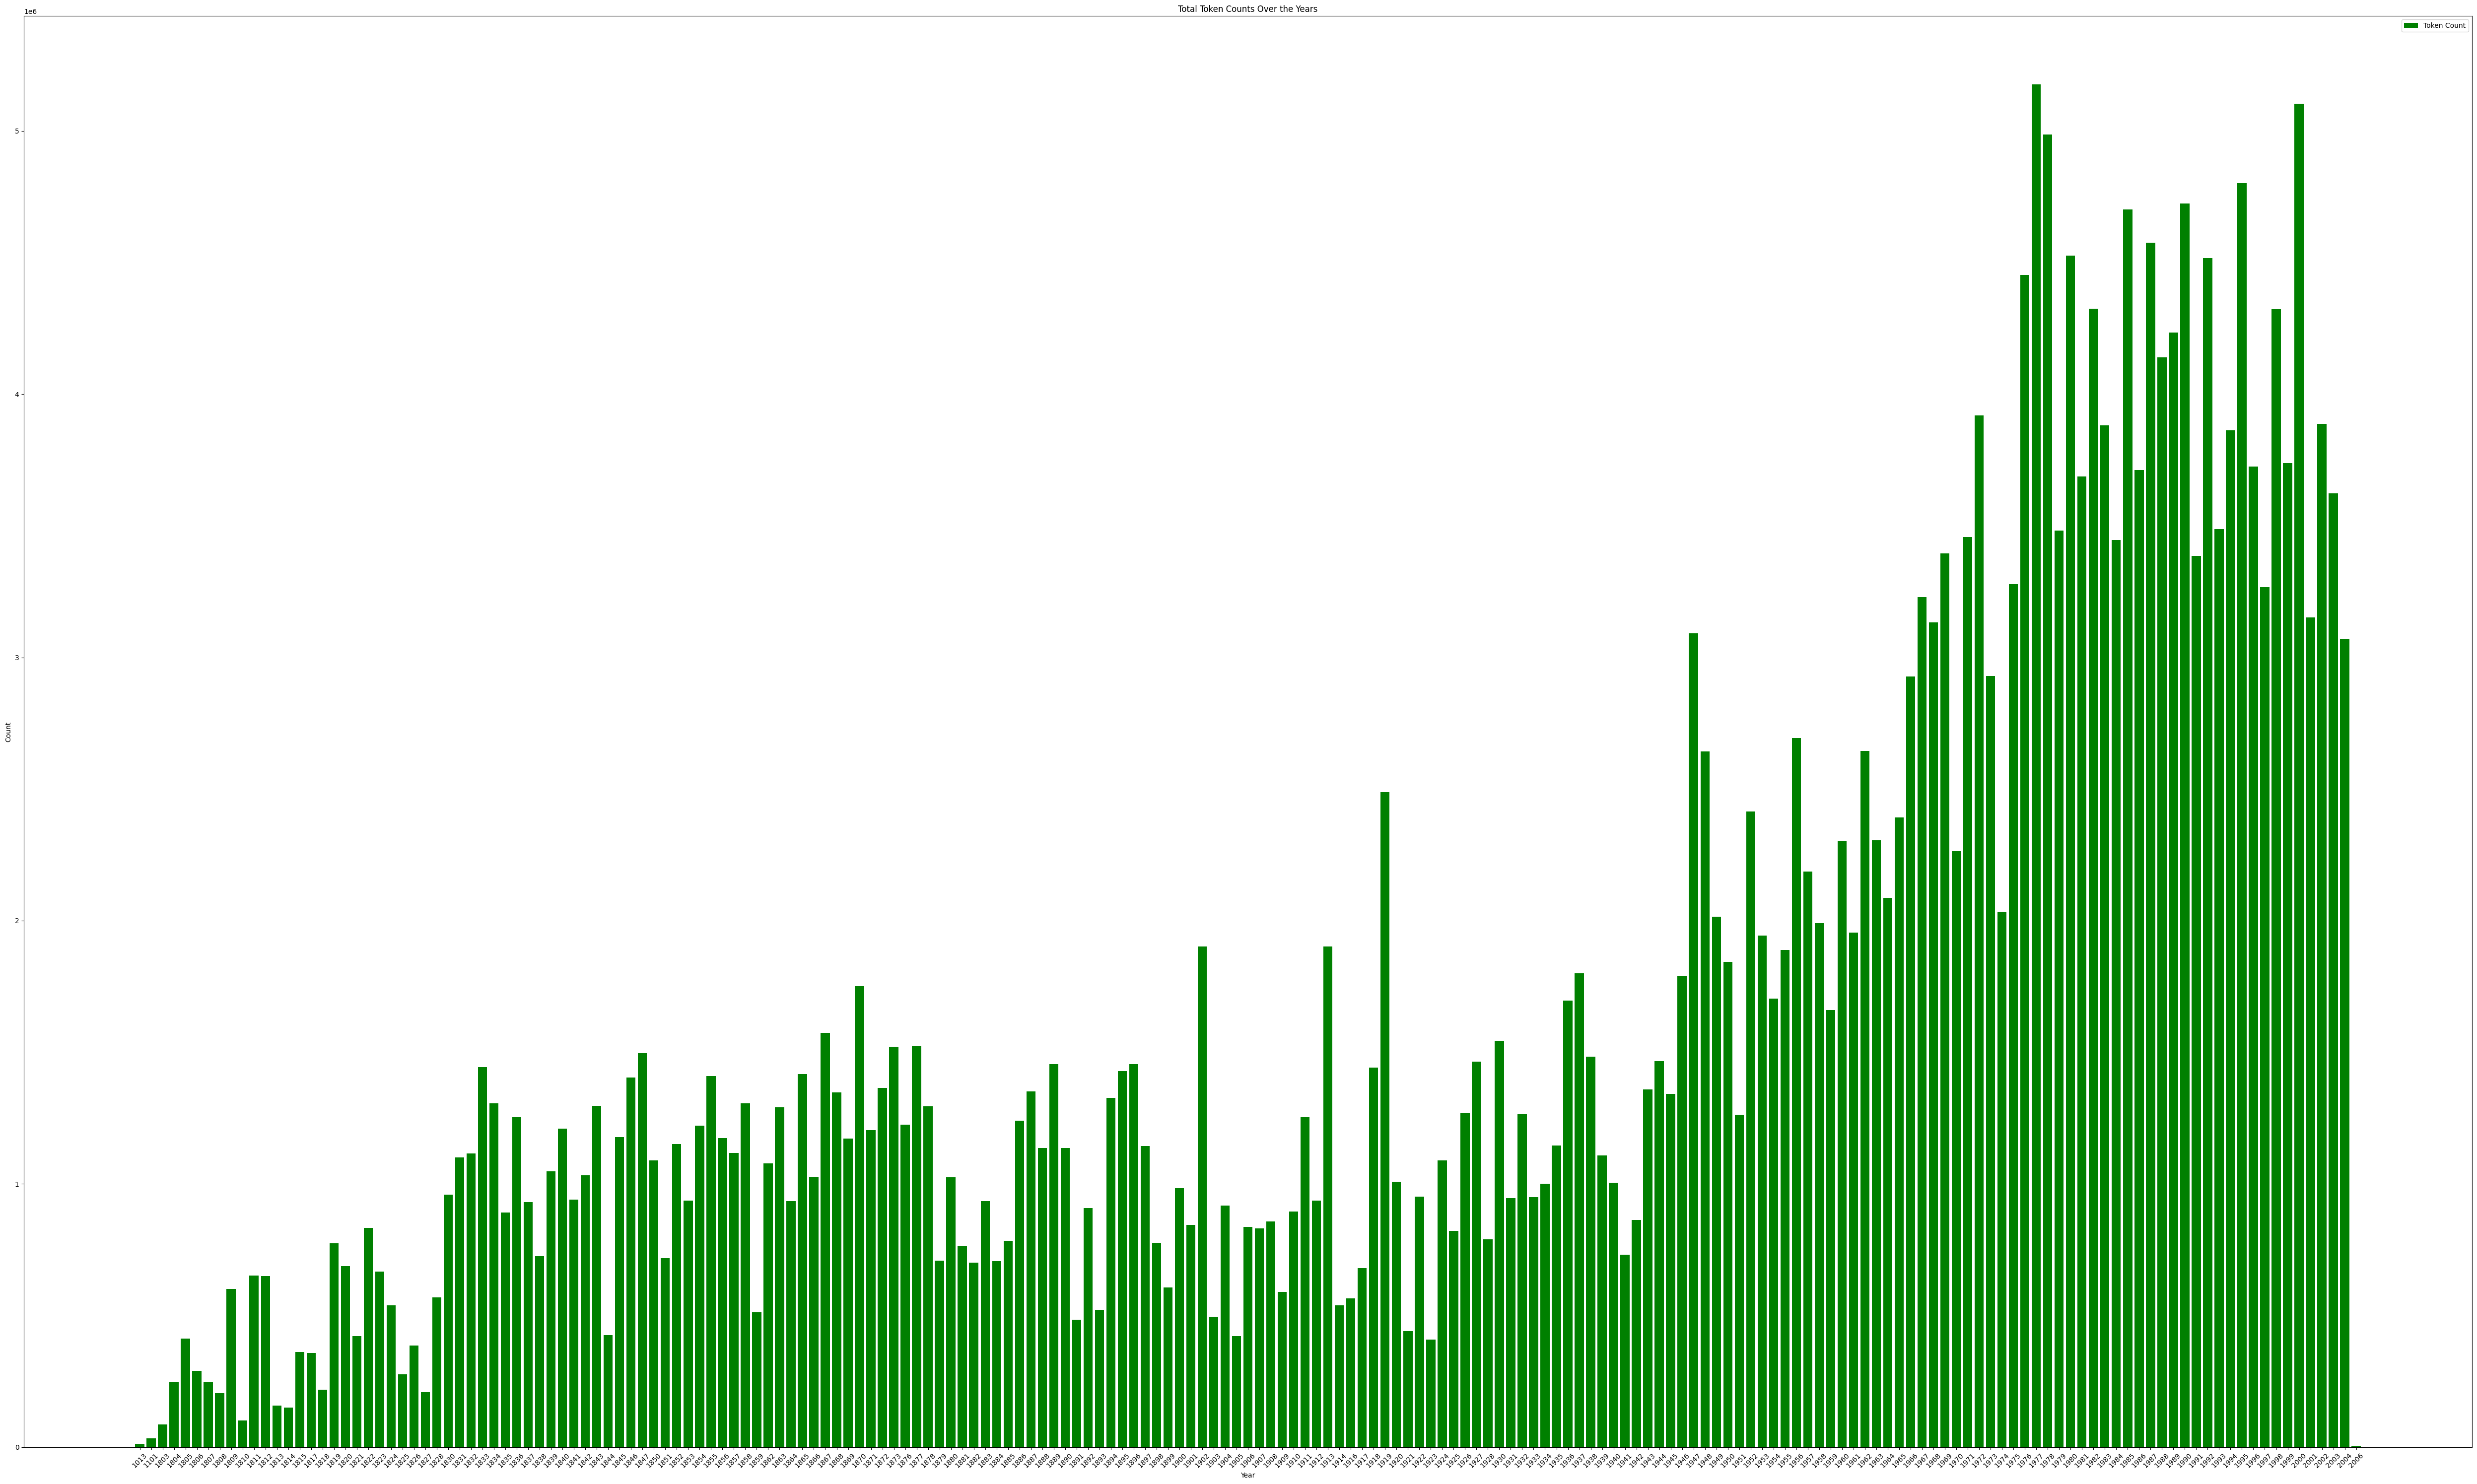

In [22]:
# Directory where the text files are located
directory = "/Users/praharshita/Desktop/Capstone/cleaned_files_by_year"

# List of filenames in the directory
filenames = [filename for filename in os.listdir(directory) if filename.endswith('.txt')]

# Dictionary to store results (token counts) for each year
result_dict = {}
result_lock = threading.Lock()

# Create threads to process files concurrently
threads = []
for filename in filenames:
    year = os.path.splitext(filename)[0]
    thread = threading.Thread(target=count_tokens, args=(os.path.join(directory, filename), result_dict, year))
    threads.append(thread)
    thread.start()

# Wait for all threads to finish
for thread in threads:
    thread.join()

# Plot token counts for each year
plot_token_counts(result_dict)

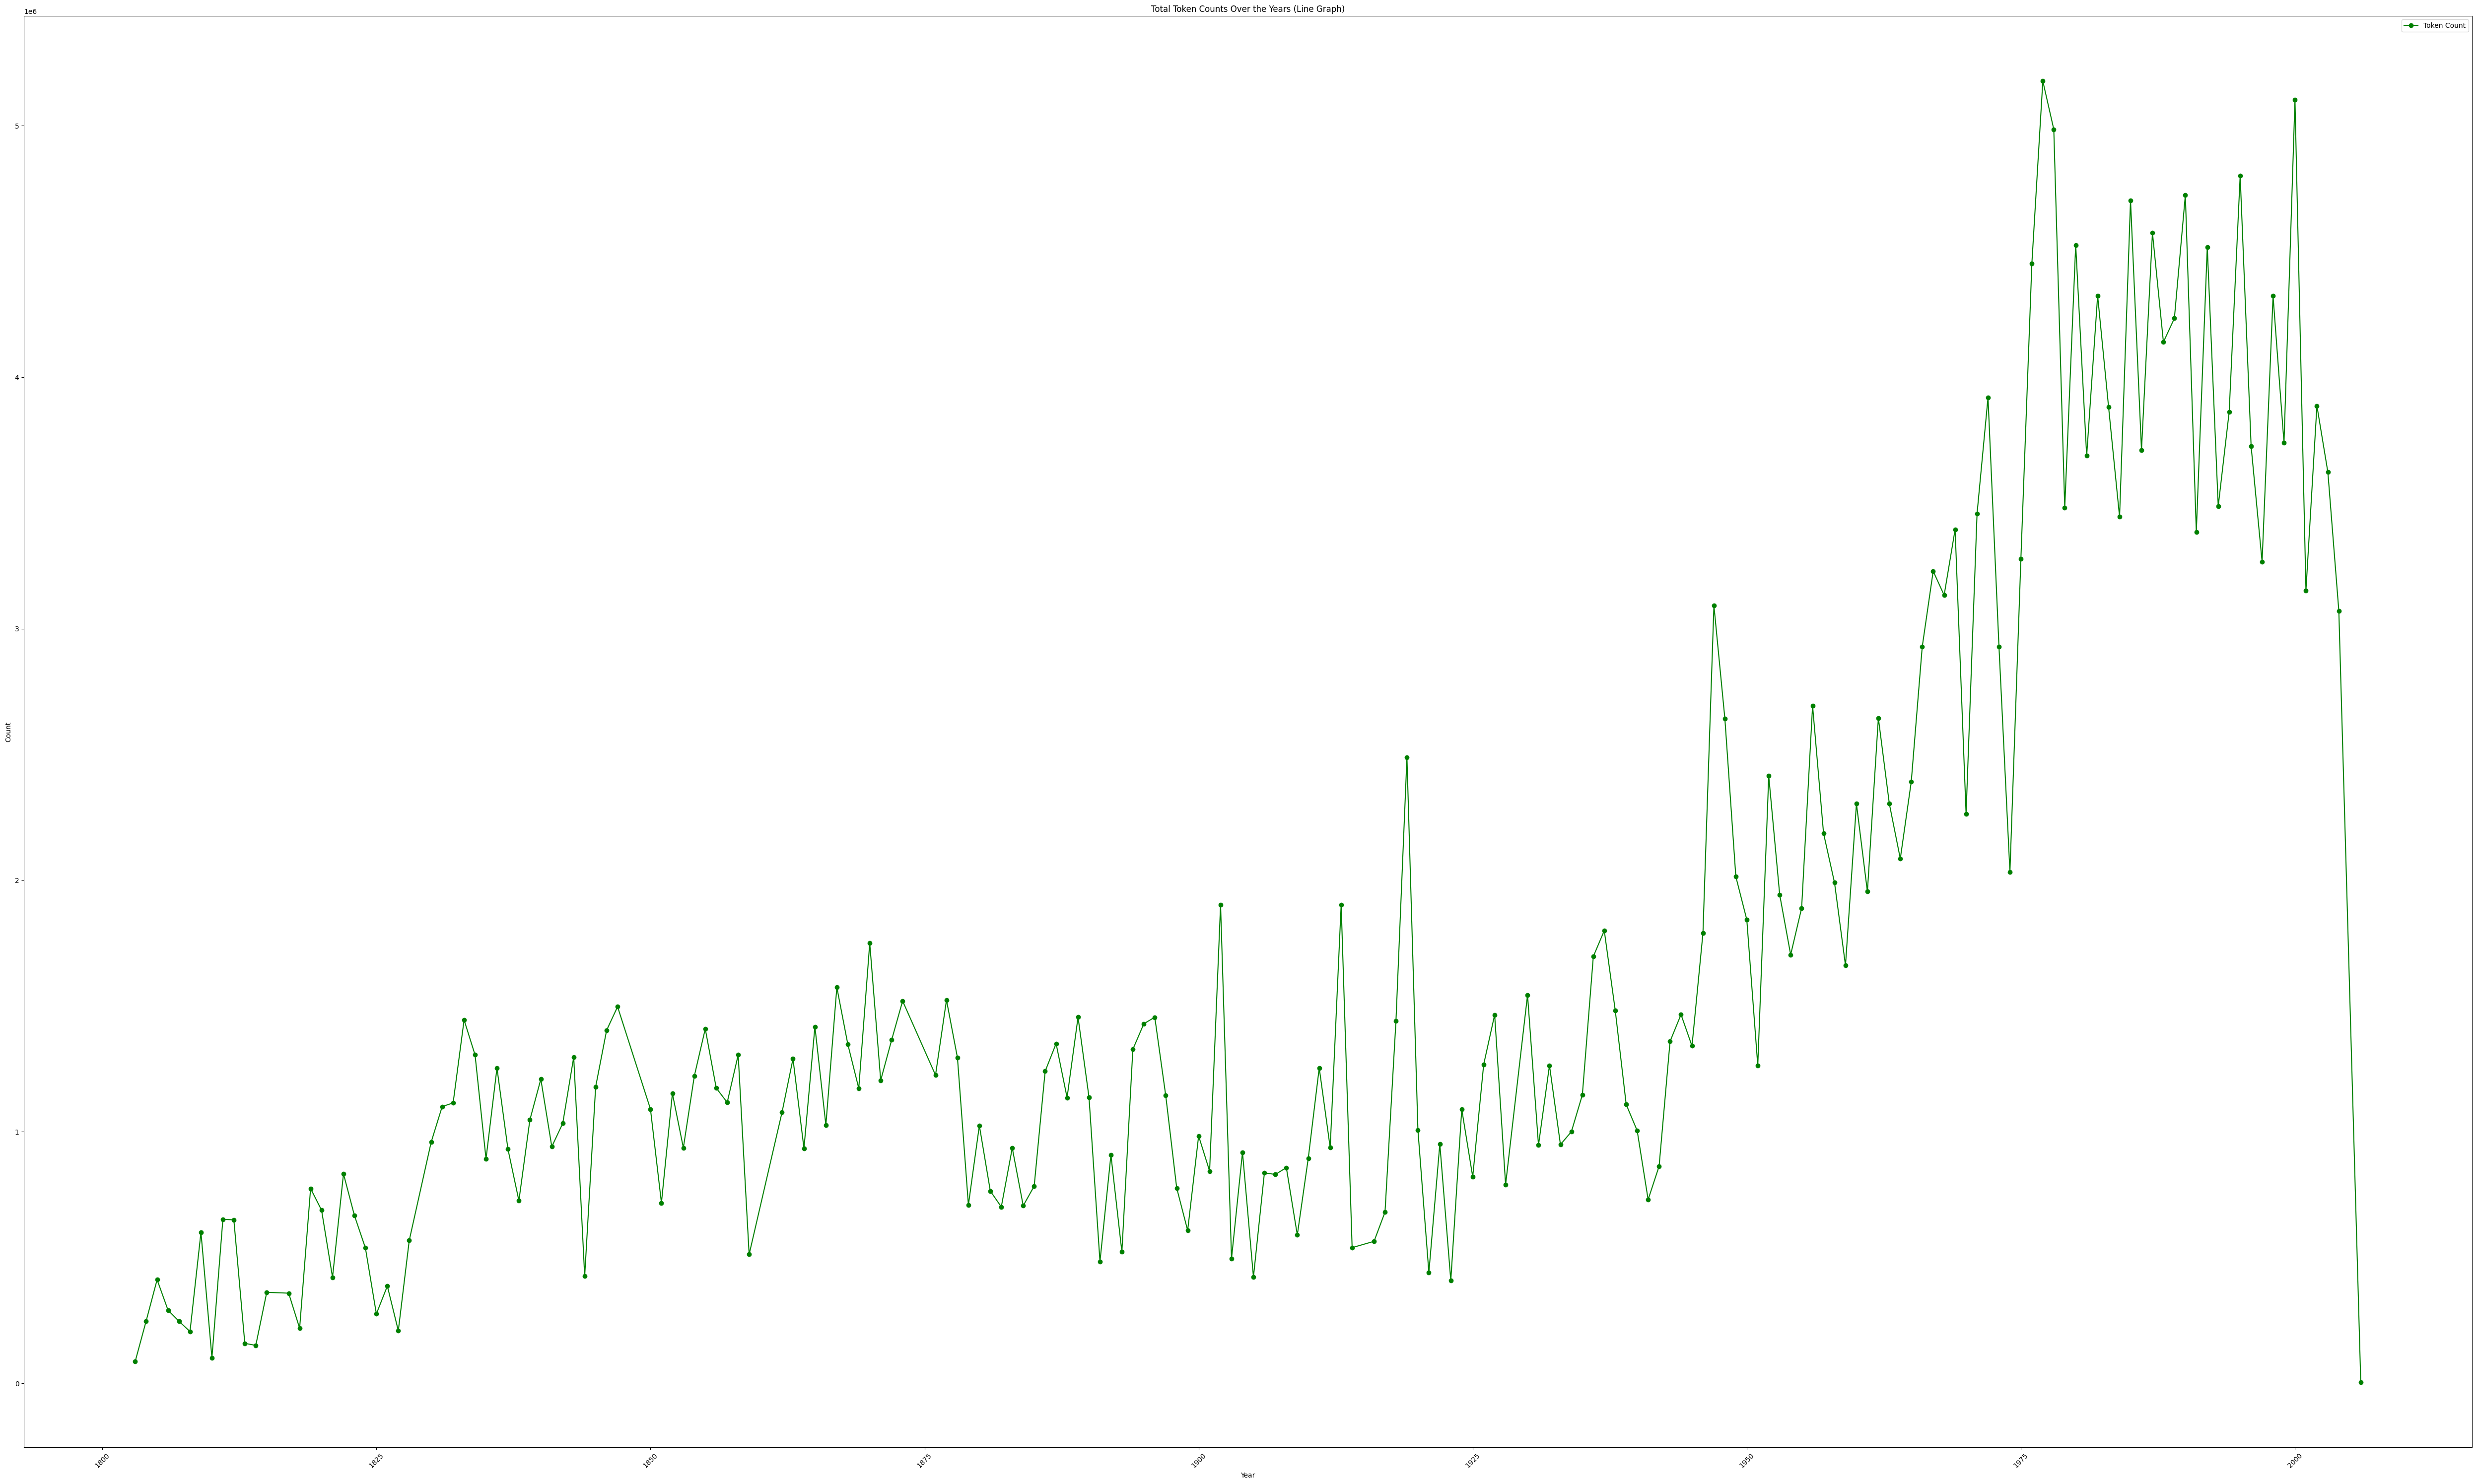

In [34]:
plot_token_counts_line(result_dict)

In [20]:

def process_file(file_path, exclude_words):
    word_counts = Counter()

    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Tokenize and apply any necessary preprocessing
    tokens = content.lower().split()

    # Exclude specified words
    tokens = [token for token in tokens if token not in exclude_words]

    # Update word counts for the current year
    word_counts.update(tokens)

    # Get the top 5 words for the current year
    top_words_year = [word for word, count in word_counts.most_common(5)]

    return {'Year': os.path.basename(file_path)[:-4], 'Top Words': top_words_year}

def top_words(directory):
    # List of words to be excluded
    exclude_words = ['hon', 'lord', 'said', "'s", 'would', 'could', 'house', 'mr', 'government', 'state', 'noble',
                     'secretary', 'people', "''", 'upon', 'whether', 'made', 'many', 'make', 'ask', 'one', 'may', "mr."]
    exclude_words.extend(stopwords.words('english'))

    # Initialize an empty DataFrame to store results
    df_results = pd.DataFrame(columns=['Year', 'Top Words'])

    # Iterate through files in the directory using threading
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []

        for filename in os.listdir(directory):
            if filename.endswith('.txt'):
                file_path = os.path.join(directory, filename)
                futures.append(executor.submit(process_file, file_path, exclude_words))

        # Wait for all threads to complete and collect results
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            df_results = df_results.append(result, ignore_index=True)

    # Sort the DataFrame by the 'Year' column in ascending order
    df_results['Year'] = df_results['Year'].astype(int)
    df_results = df_results.sort_values(by='Year').reset_index(drop=True)

    return df_results


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/praharshita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
directory = '/Users/praharshita/Desktop/Capstone/cleaned_files_by_year'
df=top_words(directory)
print(df)

df.to_csv('//Users/praharshita/Desktop/Capstone/test/top_words_results.csv', index=False)


/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_5037/1984216486.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(result, ignore_index=True)
/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_5037/1984216486.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(result, ignore_index=True)
/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_5037/1984216486.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(result, ignore_index=True)
/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_5037/1984216486.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

   Year                                      Top Words
0  1807         [bill, right, country, might, present]
1  1808     [right, catholics, country, gent, present]
2  1809            [might, country, gent, right, must]
3  1921            [bill, think, lordships, time, say]
4  1922        [question, bill, right, think, country]
5  1923          [bill, think, question, country, say]
6  2003  [department, minister, health, local, friend]
7  2004     [minister, bill, lords, department, local]
8  2006            [business, per, new, service, cent]


/var/folders/h9/24vbd1m931s_2j_jt_vy8cyr0000gn/T/ipykernel_5037/1984216486.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(result, ignore_index=True)
